## Magic Angle Hopping Experiment simulated in Pygamma Eric Hughes 

## Two isolated spin system

In [1]:


import numpy as np
import scipy
import pylab
import pygamma
from scipy import fftpack

from pygamma import spin_system, gen_op, Iz, sigma_eq, Ixypuls_U, Fm, evolve, prop, exponential_multiply

from scipy import cos,sin, pi




In [2]:
def calculate_tiling_angles(num_tiling_points ):
    
    """Calulates tiling angles alpha, beta, gamma for MAS"""
    alpha   = scipy.zeros( num_tiling_points )
    beta    = scipy.zeros( num_tiling_points )
    gamma   = scipy.zeros( num_tiling_points )
    
    twos_array = np.array([1,2,4,8,16,32,64,128,256,512,1024,2048,4096,8192,16384,32768,65536])
    threes_array = np.array([1,3,9,27,81,243,729,2187,6561,19683,59049])  

    num_twos = len(twos_array)-1; print( num_twos)
    num_threes = len(threes_array)-1; print( num_threes)
    
    for m in range( num_tiling_points ):
    
        number = 1*m
        alphaa = 0.0
        for j in range(num_threes, -1, -1 ):
        
            num = number/threes_array[j]
        
            number = number - num*threes_array[j]
            alphaa  = alphaa + num / ( 3.0 * threes_array[j] )
        
        alpha[m] = alphaa * 2.0 * scipy.pi
    
        beta[m] =  1.0* m * scipy.pi / ( 1.0 * num_tiling_points )
    
    
        gammaa = 0.0
        for j in range(num_twos):
    
           if m & twos_array[j]:
            
                gammaa = gammaa + 1.0/(1.0*twos_array[j+1])
            
        gamma[m] = gammaa * 2.0 * scipy.pi
    
    return( alpha, beta, gamma )

 

### Calculate Hamiltonian using Hammersley Tiling Points 

$$ \omega \left ( r \right ) = \delta_0 + \delta \space \left ( C_1 \space \cos  \space   \omega_r  +
                                                                S_1 \space \sin  \space   \omega_r  +
                                                                C_2 \space \cos  \space 2 \omega_r  +
                                                                S_2 \space \sin  \space 2 \omega_r 
\right )
$$

where :


$$
C_1 = \frac {1}{2} \sin 2 \theta  \space \sin  \beta  \space \cos  \beta \space \left [ \space \eta \space \cos ( 2 \gamma - 3 ) \space \cos  \alpha - \eta \space \sin 2 \gamma \space \sin \alpha \space \right ]
$$ 


$$
S_1 = \frac {1}{2} \sin 2 \theta  \space \sin  \beta  \space \cos  \beta \space \left [ \space \eta \space \cos ( 2 \gamma - 3 ) \space \sin  \alpha - \eta \space \sin 2 \gamma \space \cos \alpha \space \right ]
$$



$$
C_2 = \frac {1} {2} \space \sin^2 \theta \space  ( \cos 2 \alpha \space \left [ \frac {3}{2} \space \sin^2 \beta + \frac {1}{2} \eta \space \cos 2 \gamma \space ( 1 + \cos^2 \beta ) \right ] - \eta \space \cos \beta \space \sin 2 \gamma \space \sin 2 \alpha )
$$

$$
S_2 = \frac {1} {2} \space \sin^2 \theta \space  ( \sin 2 \alpha \space \left [ \frac {3}{2} \space \sin^2 \beta + \frac {1}{2} \eta \space \cos 2 \gamma \space ( 1 + \cos^2 \beta ) \right ] - \eta \space \cos \beta \space \sin 2 \gamma \space \cos 2 \alpha )
$$

In [8]:

def spinning_H_angles():
    
    omega_r = np.arange(0,3)*2.0*pi/3.0
    [alpha, beta, gamma ] = calculate_tiling_angles(num_tiling_points )

    
    theta = 54.73561*scipy.pi/180.0
    s_2t = sin(2.0*theta)
    s_t2 = sin(theta)*sin(theta)    
    s_b = sin(beta)
    c_b = cos(beta)
    s_b2 = s_b*s_b
    c_b2 = c_b*c_b
    
    c_2g = cos(2.0*gamma)
    s_2g = sin(2.0*gamma)
    
    s_a  = sin(alpha)
    c_a  = cos(alpha)
    c_2a = cos(2.0*alpha)
    s_2a = sin(2.0*alpha)
    
    C1 = 0.5*s_2t*s_b*(c_b*(eta*c_2g-3)*c_a-eta*s_2g*s_a)
    S1 = 0.5*s_2t*s_b*(c_b*(3-eta*c_2g)*s_a-eta*s_2g*c_a)
    
    C2 = 0.5*s_t2*((1.5*s_b2+0.5*eta*c_2g*(1+c_b2))*c_2a - eta*c_b*s_2g*s_2a)

    S2 = 0.5*s_t2*(-1*(1.5*s_b2+0.5*eta*c_2g*(1+c_b2))*s_2a - eta*c_b*s_2g*c_2a)

    c_omega_r = cos(omega_r)
    s_omega_r = sin(omega_r)
    c_2_omega_r = cos(2.0*omega_r)
    s_2_omega_r = sin(2.0*omega_r)

    H1  =  (delta_0+delta*( np.outer(C1,c_omega_r)+np.outer(S1,s_omega_r)+np.outer(C2,c_2_omega_r)+np.outer(S2,s_2_omega_r)))

    C1 = 0.5*s_2t*s_b*(c_b*(eta1*c_2g-3)*c_a-eta1*s_2g*s_a)
    S1 = 0.5*s_2t*s_b*(c_b*(3-eta1*c_2g)*s_a-eta1*s_2g*c_a)
    
    C2 = 0.5*s_t2*((1.5*s_b2+0.5*eta1*c_2g*(1+c_b2))*c_2a - eta1*c_b*s_2g*s_2a)

    S2 = 0.5*s_t2*(-1*(1.5*s_b2+0.5*eta1*c_2g*(1+c_b2))*s_2a - eta1*c_b*s_2g*c_2a)

    H2  =  (delta1_0+delta1*( np.outer(C1,c_omega_r)+np.outer(S1,s_omega_r)+np.outer(C2,c_2_omega_r)+np.outer(S2,s_2_omega_r)))
    
    return( omega_r, H1, H2, s_b)    
    


## Expermental and Spin System Parameters

In [9]:

    
Larmor_freq = 100.0 # MHz
sw1         = 50.0e3   #Hz
sw2         = 10e3 # Hz

dt2 = dw2 = 1./sw1
dt1 = dw1 = 1./sw2
    
np2 = 512
np1 = 128
    
# Chemical Shift Values

delta_0     = 30.0*Larmor_freq;
delta       = -2.0* 80.*Larmor_freq/3.0
eta         = 0.5

delta1_0     = -35.0*Larmor_freq;
delta1       = 2.0* 80.*Larmor_freq/3.0
eta1         = 0.75


lb = 20.0
num_tiling_points = 500
    
# Spin System

sys = spin_system(2)
sys.spectrometer_frequency(Larmor_freq)
sys.Omega(Larmor_freq)


Ized     = Iz(sys,0)
identity = gen_op(pygamma.Ie(sys,0))

sigma_eq = sigma_eq(sys)
    
sigma_0 =  gen_op()

TypeError: __call__() missing 1 required positional argument: 'col'

## Unitary Pulse and Detection Operators

In [10]:

# Pulse phases and Unitary operators

#    phase_down_pos = [ 90.0, 90.0, 90.0, 90.0 ]
#    phase_sel0_pos = [ 90.0,  0.0,  0.0, 90.0 ]
#    phase_sel1_pos = [ 90.0,  0.0, 90.0,  0.0 ] 
#    phase_sel2_pos = [ 90.0, 90.0,  0.0,  0.0 ]

#    phase_detect_pos = [ 90.0, 90.0, 90.0, 90.0 ]

#    phase_down_min = [ 90.0, 90.0, 90.0, 90.0 ]
#    phase_sel0_min = [  0.0, 90.0, 90.0,  0.0 ]
#    phase_sel1_min = [ 90.0,  0.0, 90.0,  0.0 ]
#    phase_sel2_min = [ 90.0, 90.0,  0.0,  0.0 ]

#    phase_detect_min = [ 90.0, 90.0, 90.0, 90.0 ]

#phase_down_pos = [ 90.0, 90.0, 90.0, 90.0 ]

#phase_sel0_pos = [  0.0, 90.0, 90.0, 0.0 ]
#phase_sel1_pos = [  0.0, 90.0,  0.0, 90.0 ] 
#phase_sel2_pos = [  0.0,  0.0, 90.0, 90.0 ]

#phase_detect_pos = [ 0.0, 180.0, 180.0, 180.0 ]

#phase_down_min = [ 90.0, 90.0, 90.0, 90.0 ]
#phase_sel0_min = [ 90.0,  0.0,  0.0, 90.0 ]
#phase_sel1_min = [  0.0, 90.0,  0.0, 90.0 ]
#phase_sel2_min = [  0.0,  0.0, 90.0, 90.0 ]

#phase_detect_min = [ 180.0, 180.0, 180.0, 0.0 ]


# Good phases

phase_down_pos = [ 90.0, 90.0, 90.0, 90.0 ]

phase_sel0_pos = [  270.0, 0.0, 0.0, 270.0 ]
phase_sel1_pos = [  270.0, 0.0,  270.0, 0.0 ] 
phase_sel2_pos = [  270.0,  270.0, 0.0, 0.0 ]

phase_detect_pos = [ 0.0, 180.0, 180.0, 180.0 ]

phase_down_min = [ 90.0, 90.0, 90.0, 90.0 ]
phase_sel0_min = [ 0.0,  270.0,  270.0, 0.0 ]
phase_sel1_min = [  270.0, 0.0,  270.0, 0.0 ]
phase_sel2_min = [  270.0,  270.0, 0.0, 0.0 ]

phase_detect_min = [ 180.0, 180.0, 180.0, 0.0 ]


phase_quad = [ 0.0, 0.0, 0.0, 0.0 ]
    
Up_down_pos = [gen_op()]*4
Up_sel0_pos = [gen_op()]*4
Up_sel1_pos = [gen_op()]*4
Up_sel2_pos = [gen_op()]*4

Up_down_min = [gen_op()]*4
Up_sel0_min = [gen_op()]*4
Up_sel1_min = [gen_op()]*4
Up_sel2_min = [gen_op()]*4

detect_array_p = [gen_op()]*4
detect_array_m = [gen_op()]*4
    
print( "Hello world")

Up_quad = [pygamma.gen_op()]*4

Hello world


In [11]:
for i in range(4):
    
        Up_down_pos[i] = Ixypuls_U( sys, phase_down_pos[i], 90.0 )
        Up_sel0_pos[i] = Ixypuls_U( sys, phase_sel0_pos[i], 90.0 )
        Up_sel1_pos[i] = Ixypuls_U( sys, phase_sel1_pos[i], 90.0 )
        Up_sel2_pos[i] = Ixypuls_U( sys, phase_sel2_pos[i], 90.0 )
    
        Up_down_min[i] = Ixypuls_U( sys, phase_down_min[i], 90.0 )
        Up_sel0_min[i] = Ixypuls_U( sys, phase_sel0_min[i], 90.0 )
        Up_sel1_min[i] = Ixypuls_U( sys, phase_sel1_min[i], 90.0 )
        Up_sel2_min[i] = Ixypuls_U( sys, phase_sel2_min[i], 90.0 )

        Up_quad[i] = Ixypuls_U( sys, phase_quad[i], 90.0 )
    
        detect_array_p[i] = Fm( sys, phase_detect_pos[i] )  
        detect_array_m[i] = Fm( sys, phase_detect_min[i] )  
        

## Calculation of Data using States-Haberkorn System

In [14]:



[omega_r, H1, H2, sine_beta] = spinning_H_angles()
    
fid2dp = [pygamma.row_vector(np2, pygamma.complex(0,0))]*np1    
fid2dm = [pygamma.row_vector(np2, pygamma.complex(0,0))]*np1    
fid   =  pygamma.row_vector(np2, pygamma.complex(0,0))
    
for m in range(num_tiling_points):
        print( m, end=" ")
        iz0a = Iz(sys,0)
        iz0b = Iz(sys,1)
        iz0a *= H1[m][0]
        iz0b *= H2[m][0]
        iz0 = iz0a+iz0b
        
        iz1a = Iz(sys,0)
        iz1b = Iz(sys,1)
        iz1a *= H1[m][1]
        iz1b *= H2[m][1]
        iz1 = iz1a+iz1b        

        iz2a = Iz(sys,0)
        iz2b = Iz(sys,1)
        iz2a *= H1[m][2]
        iz2b *= H2[m][2]
        iz2 = iz2a+iz2b         


        
        for t1 in range(np1):
            u_H0 = prop(gen_op(iz0), dt1*t1)
            u_H1 = prop(gen_op(iz1), dt1*t1)
            u_H2 = prop(gen_op(iz2), dt1*t1)

            for k in range(4):
            
                sigma_p = pygamma.sigma_eq(sys)
                
                sigma_p = evolve( sigma_p, Up_down_pos[k] ) # first pulse

                sigma_p = evolve( sigma_p, u_H0 )            # first evolution period
                
                sigma_p = evolve( sigma_p, Up_sel0_pos[k])  # first storage pulse
                
                for ii in range(4):
                    for jj in range(4):
                        if ii != jj:
                            sigma_p.put( pygamma.complex(0,0), ii,jj ) 
                            
                
#                sigma_p.put( pygamma.complex(0,0), 0, 1 )   # purge xy magnetization
#                sigma_p.put( pygamma.complex(0,0), 1, 0 )

                sigma_p = evolve( sigma_p, Up_down_pos[k] ) # second pulse

                sigma_p = evolve( sigma_p, u_H1 )            # second evolution period
                
                sigma_p = evolve( sigma_p, Up_sel1_pos[k])  # second storage pulse
                
                for ii in range(4):
                    for jj in range(4):
                        if ii != jj:
                            sigma_p.put( pygamma.complex(0,0), ii,jj ) 
                            
                sigma_p = evolve( sigma_p, Up_down_pos[k] ) # third pulse

                sigma_p = evolve( sigma_p, u_H2 )            # third evolution period
                
                sigma_p = evolve( sigma_p, Up_sel2_pos[k])  # third storage pulse
                
                for ii in range(4):
                    for jj in range(4):
                        if ii != jj:
                            sigma_p.put( pygamma.complex(0,0), ii,jj ) 
                            
                sigma_p = evolve( sigma_p, Up_down_pos[k] )
                             
                pygamma.acquire(gen_op(detect_array_p[k]), sigma_p, gen_op(iz0),   dt2, np2, fid)
                
                fid2dp[t1] = fid2dp[t1]+fid*sine_beta[m]

                ####
                # Acquire -ve data
                ###
                
                sigma_m = pygamma.sigma_eq(sys)
                
                sigma_m = evolve( sigma_m, Up_down_min[k] ) # first pulse

                sigma_m = evolve( sigma_m, u_H0 )            # first evolution period
                
                sigma_m = evolve( sigma_m, Up_sel0_min[k])  # first storage pulse
                
                for ii in range(4):
                    for jj in range(4):
                        if ii != jj:
                            sigma_m.put( pygamma.complex(0,0), ii,jj ) 
                            
                sigma_m = evolve( sigma_m, Up_down_min[k] ) # second pulse

                sigma_m = evolve( sigma_m, u_H1 )            # second evolution period
                
                sigma_m = evolve( sigma_m, Up_sel1_min[k])  # second storage pulse
                
                for ii in range(4):
                    for jj in range(4):
                        if ii != jj:
                            sigma_m.put( pygamma.complex(0,0), ii,jj ) 
                            
                sigma_m = evolve( sigma_m, Up_down_min[k] ) # third pulse

                sigma_m = evolve( sigma_m, u_H2 )            # third evolution period
                
                sigma_m = evolve( sigma_m, Up_sel2_min[k])  # third storage pulse
                
                for ii in range(4):
                    for jj in range(4):
                        if ii != jj:
                            sigma_m.put( pygamma.complex(0,0), ii,jj ) 
                            
                sigma_m = evolve( sigma_m, Up_down_min[k] )
                             
                pygamma.acquire(gen_op(detect_array_m[k]), sigma_m, gen_op(iz0),   dt2, np2, fid)
                
                fid2dm[t1] = fid2dm[t1]+fid*sine_beta[m]

        


16
10
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 

## FFT in t2 dimension

In [15]:
for i,fid in enumerate(fid2dp):
        exponential_multiply( fid, -50.0)
        fid2dp[i] = fid.FFT()
        
for i,fid in enumerate(fid2dm):
        exponential_multiply( fid, -50.0)
        fid2dm[i] = fid.FFT()
        
 
    

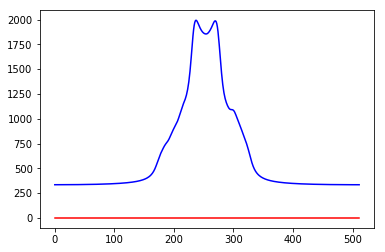

In [19]:
pylab.plot( fid2dp[0].Real(), 'b')
pylab.plot( fid2dm[0].Real(), 'r')


## Combine 2 Data sets before FFT in second dimension

In [20]:
fid2d_plus = scipy.zeros((np2,np2), dtype = scipy.complex64)
    
for i in range(np1):
        rrr = scipy.array( fid2dp[i].Real() )
        iii = scipy.array( fid2dm[i].Real() )
        
        rrr = rrr - rrr[0:100].mean()
        iii = iii - iii[0:100].mean()
        
        ccc =scipy.array( rrr+1j*iii)
        
        fid2d_plus[i] += ccc
        


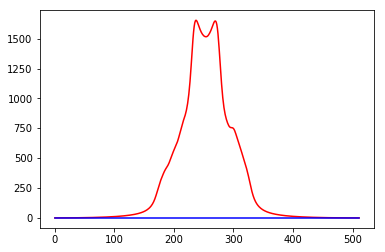

In [22]:
pylab.plot( fid2d_plus[0].real, 'r' )
pylab.plot( fid2d_plus[0].imag, 'b' )

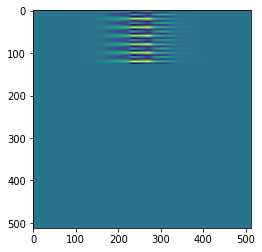

In [23]:
pylab.imshow( fid2d_plus.real);

In [24]:
fid2d_plus = fid2d_plus.transpose()

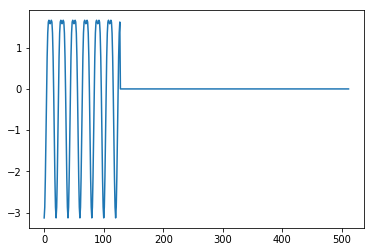

In [25]:
t1 = scipy.arange(np2)*dw1
#pylab.plot( fid2d_plus[0].real*scipy.exp(-300.0*t1))
pylab.plot( fid2d_plus[0].real)

In [26]:


for i in range(np2 ):
    fid2d_plus[i] = fid2d_plus[i]*scipy.exp(-300.0*t1)
    
fid2d_plus = fid2d_plus.transpose()

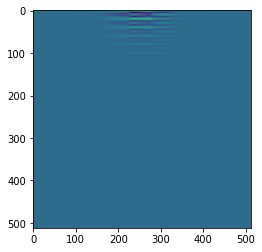

In [28]:
pylab.imshow( (fid2d_plus.real));

In [29]:

    
spec2D = fftpack.fft( fid2d_plus, axis=0)
    



In [30]:
spec2D = spec2D.transpose()
for i in range(np2):
    spec2D[i] = fftpack.fftshift( spec2D[i] )
    
spec2D = spec2D.transpose()


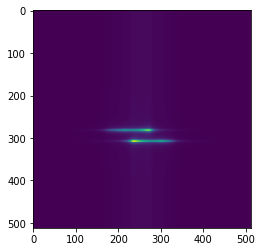

In [31]:
pylab.imshow( (spec2D).real);

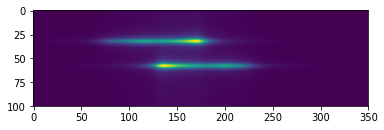

In [33]:
pylab.imshow( spec2D[250:350,100:450].real)

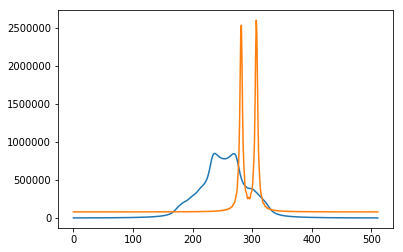

In [34]:
pylab.plot((spec2D.sum(axis=0)).real )
pylab.plot((spec2D.sum(axis=1)).real )
#plot( (spec2D[:,302]).real )
#plot( (spec2D[:,280]).real )

In [35]:
aaa = [1,2,4,5,6]


In [36]:
spec2D = spec2D.transpose()
for i in range(np2):
    spec2D[i] = spec2D[i] - (spec2D[i].real)[0:100].mean() 
    
spec2D = spec2D.transpose()

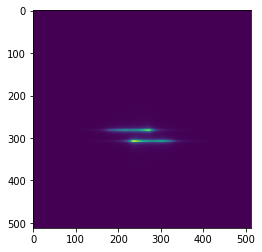

In [37]:
pylab.imshow(spec2D.real);

In [13]:
ppp =dir(pygamma)

In [14]:
ppp

['BOHRMAG',
 'CP_CHIRP95',
 'CP_DANTE',
 'CSA',
 'CYC_CHIRP95',
 'CYC_MLEV16',
 'CYC_MLEV4',
 'CYC_MLEV8',
 'CYC_WALTZ4',
 'CYC_WALTZ8',
 'CenterString',
 'DANTE',
 'DANTE_swigregister',
 'DCC',
 'DEFISO',
 'DEG2RAD',
 'D_basis',
 'Det',
 'DoubleVector',
 'DoubleVector_swigregister',
 'EAngles',
 'EAngles_SetCutoff',
 'EAngles_swigregister',
 'Elem_labels',
 'ExchProc',
 'ExchProc_Label',
 'ExchProc_swigregister',
 'FID',
 'FIDrot',
 'FIDx',
 'Fa',
 'Fa_sp',
 'Faxis',
 'Faxis_sp',
 'Fb',
 'Fb_sp',
 'Fe',
 'Fe_sp',
 'Fm',
 'Fm_sp',
 'Fp',
 'Fp_sp',
 'Fpdt',
 'Fplane',
 'Fpol',
 'Fpol_gen',
 'Fpol_gen_new',
 'Fpol_sp',
 'Fx',
 'Fx_sp',
 'Fxy',
 'Fxy_sp',
 'Fy',
 'Fy_sp',
 'Fz',
 'Fz_sp',
 'GAMMA1H',
 'GAMMAe',
 'GAMMAerror',
 'GAMMAfatal',
 'GARP',
 'GARP_swigregister',
 'GAUSS2GHZ',
 'GAUSS2HZ',
 'GFREE',
 'GHZ2GAUSS',
 'GIntvec',
 'GNvect',
 'GamIntVecInit',
 'GamSParInit',
 'Gangle',
 'Gdec',
 'Gdec2',
 'GenericD',
 'Gform',
 'GgamB1',
 'Ghistogram',
 'Gitoa',
 'Gpuldat',
 'Gpuldat_sw

In [17]:
[p for p in ppp if "dan" in p[:3].lower()]

['DANTE', 'DANTE_swigregister']

In [19]:
help(pygamma.row_vector.exp)

Help on function exp in module pygamma:

exp(self)
    exp(matrix self) -> matrix

